In [65]:
import  pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60933 entries, 0 to 60932
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             60933 non-null  int64  
 1   Date              60933 non-null  object 
 2   Customer_ID       60933 non-null  int64  
 3   Transaction_ID    60933 non-null  int64  
 4   SKU_Category      60933 non-null  object 
 5   SKU               60933 non-null  object 
 6   Quantity          60933 non-null  float64
 7   Sales_Amount      60933 non-null  float64
 8   Operational_Cost  60933 non-null  float64
 9   Customer_Age      60933 non-null  int64  
 10  is_outlier        60933 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 4.7+ MB


In [66]:
df["Profit"] = df["Sales_Amount"] - df["Operational_Cost"]
grouped_df = df.groupby(['SKU_Category'])

profit_df = grouped_df['Profit'].sum()

profit_df = profit_df.sort_values()

print(profit_df)

SKU_Category
Crop Top          81195.6
Jeans             84063.9
Skirt             86799.8
Sunglasses        93287.8
Blazer            95096.2
Trench coat      102553.9
Cargo pants      110847.4
Shoes            121450.5
Hoodie           122737.7
Shorts           130615.1
Bomber jacket    133119.3
Dress shirt      135310.2
T-shirt          185555.9
Hat              210938.2
Dresses          336978.3
Name: Profit, dtype: float64


In [67]:
grouped_df = df.groupby('SKU')

order_count_df = grouped_df.size()

order_count_df = order_count_df.sort_values(ascending=False)

order_count_df.head(n = 10)

SKU
UNJKW    2007
COWU2     791
OV1P9     735
M6J9W     698
TL4WZ     600
QGK3S     593
CZUZX     585
A59HR     557
DMJ70     522
E3PAN     511
dtype: int64

/var/folders/ny/yxqk54nd03j660zcv8_w0ryh0000gn/T/ipykernel_25962/2340092063.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spend = df.groupby('Age_Group')['Sales_Amount'].sum()


Age_Group
16-20     72971.5
21-25    485140.1
26-30    676638.2
31-35    682272.9
36-40    618115.6
41-45    627869.7
46-50    633365.1
51-55    664073.7
56-60    413481.4
61-65     58025.6
66+         100.0
Name: Sales_Amount, dtype: float64


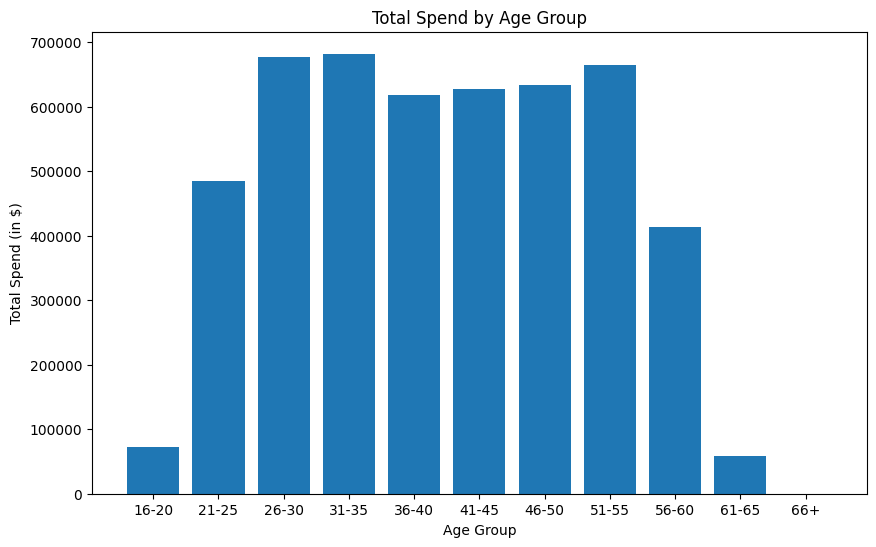

In [74]:
age_bins = [16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 68]
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']

df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels)

age_group_spend = df.groupby('Age_Group')['Sales_Amount'].sum()

print(age_group_spend)

plt.figure(figsize=(10, 6))
plt.bar(age_group_spend.index, age_group_spend.values)
plt.xlabel('Age Group')
plt.ylabel('Total Spend (in $)')
plt.title('Total Spend by Age Group')
plt.show()

/var/folders/ny/yxqk54nd03j660zcv8_w0ryh0000gn/T/ipykernel_25962/2830529593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_transaction_count = df.groupby('Age_Group')['Transaction_ID'].count()


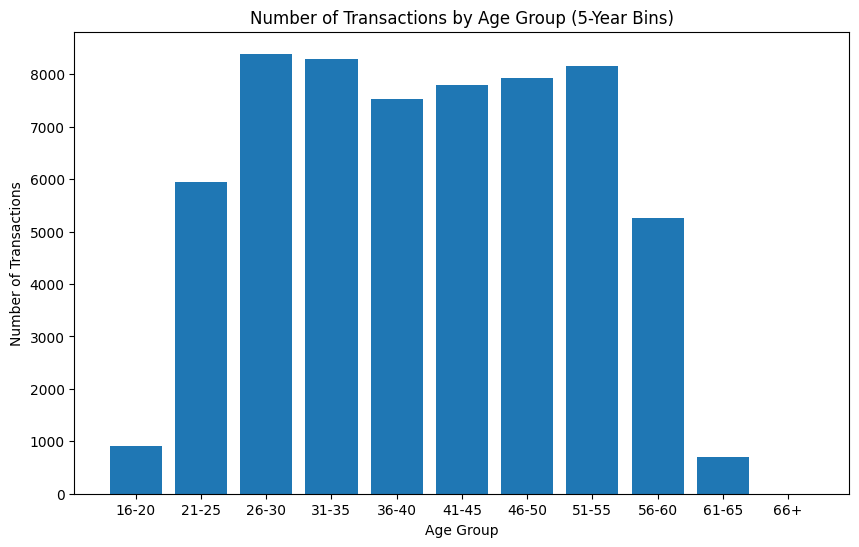

In [76]:
age_group_transaction_count = df.groupby('Age_Group')['Transaction_ID'].count()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(age_group_transaction_count.index, age_group_transaction_count.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Age Group (5-Year Bins)')
plt.show()

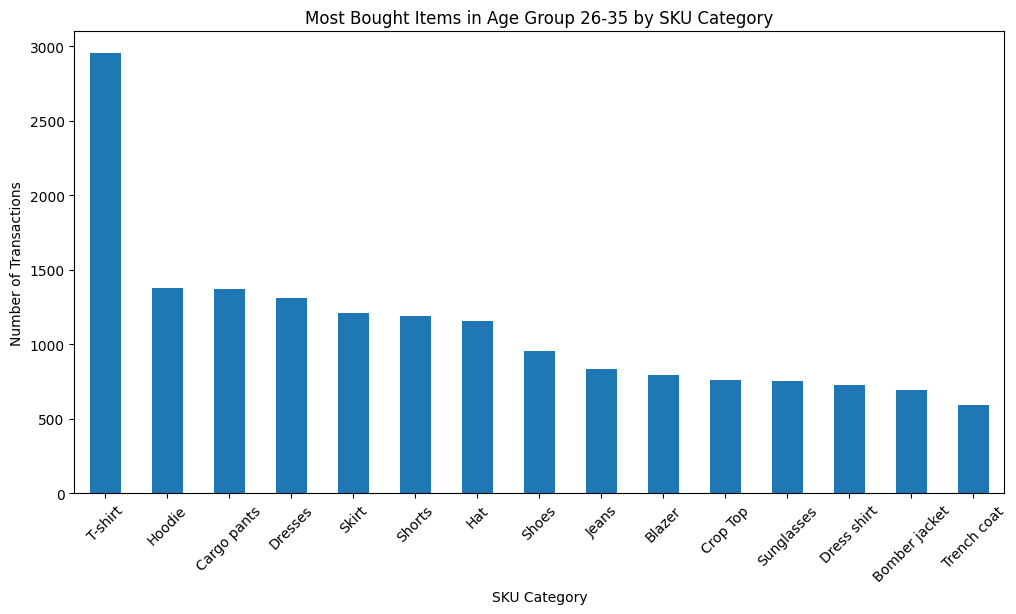

In [77]:
filtered_data = df[(df['Age_Group'] == '26-30') | (df['Age_Group'] == '31-35')]

# Group the filtered data by SKU Category and count the transactions
category_transaction_count = filtered_data.groupby('SKU_Category')['Transaction_ID'].count()

# Sort the categories by transaction count in descending order
category_transaction_count = category_transaction_count.sort_values(ascending=False)

# Create a bar graph using Matplotlib
plt.figure(figsize=(12, 6))
category_transaction_count.plot(kind='bar')
plt.xlabel('SKU Category')
plt.ylabel('Number of Transactions')
plt.title('Most Bought Items in Age Group 26-35 by SKU Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [84]:
item_summary = df.groupby('SKU_Category').agg({'Sales_Amount': 'mean', 'Transaction_ID': 'count'})

# Rename the columns for clarity
item_summary.columns = ['Total Revenue', 'Number of Transactions']

# Sort the items based on the number of transactions (order count) in descending order
item_summary = item_summary.sort_values(by='Number of Transactions', ascending=False)

# Select the top 10 most ordered items
top_10_items = item_summary.head(10)

# Display the table
print(top_10_items)

              Total Revenue  Number of Transactions
SKU_Category                                       
T-shirt           45.044786                   10894
Hoodie            66.763266                    5077
Cargo pants       65.743360                    4834
Dresses          152.447940                    4829
Shorts            57.263019                    4551
Skirt             66.982803                    4460
Hat               87.027087                    4301
Shoes            103.795035                    3162
Blazer            73.259268                    3032
Jeans             72.827167                    3011


In [85]:
most_expensive_skus = df.groupby('SKU_Category').apply(lambda x: x.loc[x['Sales_Amount'].idxmax()])

# Select and display the SKU, SKU Category, and Sales Amount in a table
most_expensive_skus_table = most_expensive_skus[['SKU', 'SKU_Category', 'Sales_Amount']]

print(most_expensive_skus_table)

                 SKU   SKU_Category  Sales_Amount
SKU_Category                                     
Blazer         AEOFD         Blazer         380.4
Bomber jacket  E3NG7  Bomber jacket         388.4
Cargo pants    YS1VF    Cargo pants         275.7
Crop Top       11H2S       Crop Top         397.5
Dress shirt    6DCYD    Dress shirt         383.7
Dresses        YKTBM        Dresses         398.4
Hat            8KQ9S            Hat         366.2
Hoodie         280WP         Hoodie         392.7
Jeans          BKO3J          Jeans         310.9
Shoes          MXDHL          Shoes         380.4
Shorts         2Y5UT         Shorts         385.8
Skirt          6OUVC          Skirt         315.0
Sunglasses     BNWAF     Sunglasses         384.7
T-shirt        61VFY        T-shirt         302.7
Trench coat    ARZ2R    Trench coat         384.3


In [90]:
# Calculate the average price of SKUs within each SKU category
average_prices = df.groupby('SKU_Category')['Sales_Amount'].mean()

# Create a DataFrame with SKU Category, Average Price, and Most Expensive SKU
sku_summary = pd.DataFrame({
    'SKU_Category': average_prices.index,
    'Average Price': average_prices.values})

# Display the table
print(sku_summary)

     SKU_Category  Average Price
0          Blazer      73.259268
1   Bomber jacket     117.367562
2     Cargo pants      65.743360
3        Crop Top     109.421522
4     Dress shirt      90.181864
5         Dresses     152.447940
6             Hat      87.027087
7          Hoodie      66.763266
8           Jeans      72.827167
9           Shoes     103.795035
10         Shorts      57.263019
11          Skirt      66.982803
12     Sunglasses     109.476311
13        T-shirt      45.044786
14    Trench coat     100.399814
